# FIND IRIS

In [1]:
from matplotlib import pyplot as plt
plt.show()

***************************************************************************************
img loaded (69, 124, 3)
CIRCLES FOUND^^^\]
img out (69, 124)
img after reading (69, 124, 3)
img_msrcp (69, 124, 3)
***************************************************************************************
img loaded (69, 124, 3)
CIRCLES FOUND^^^\]
img out (69, 124)
imagePath irises/eyes\photo11_Face_1_Left.jpeg
***************************************************************************************
img loaded (65, 124, 3)
CIRCLES FOUND^^^\]
img out (65, 124)
img after reading (65, 124, 3)
img_msrcp (65, 124, 3)
***************************************************************************************
img loaded (65, 124, 3)
CIRCLES FOUND^^^\]
img out (65, 124)
imagePath irises/eyes\photo11_Face_1_Right.jpeg
***************************************************************************************
img loaded (95, 190, 3)
CIRCLES FOUND^^^\]
img out (95, 190)
img after reading (95, 190, 3)
img_msrcp (95, 190, 3

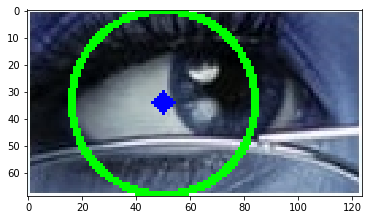

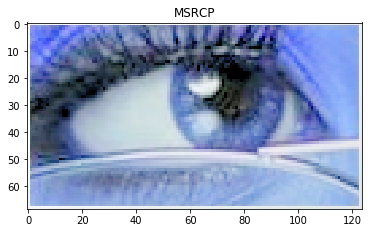

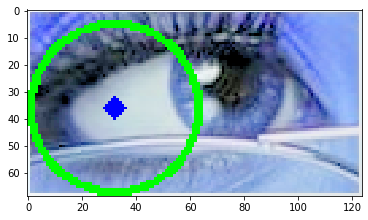

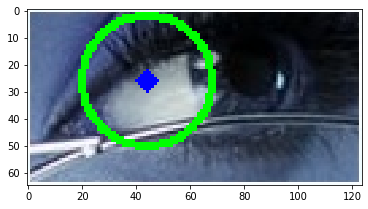

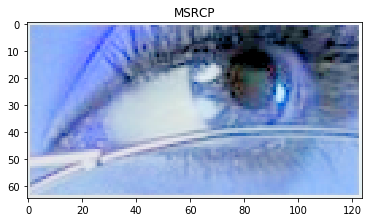

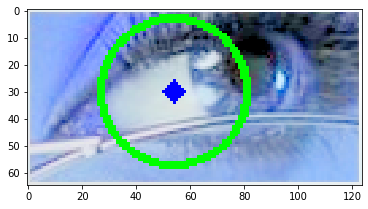

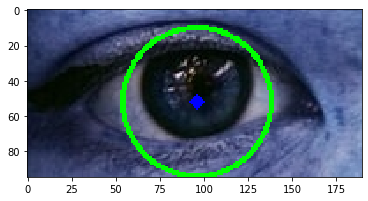

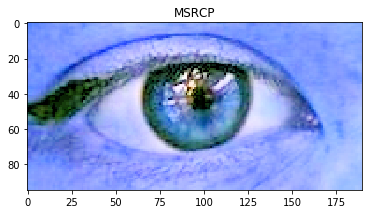

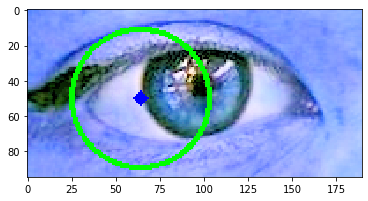

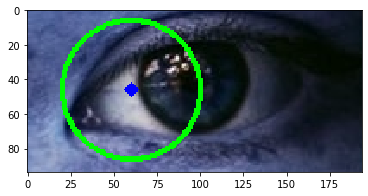

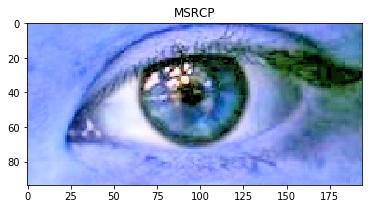

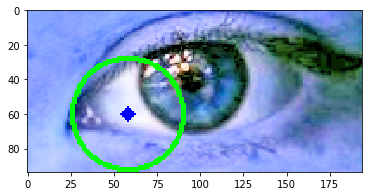

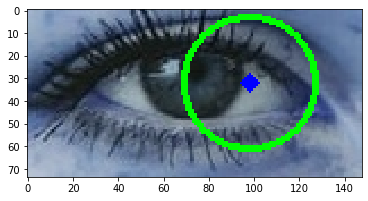

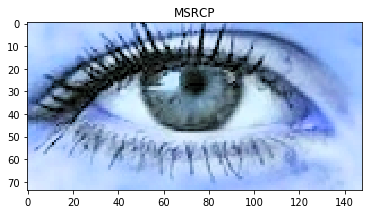

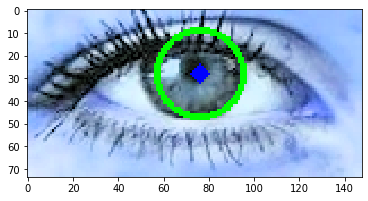

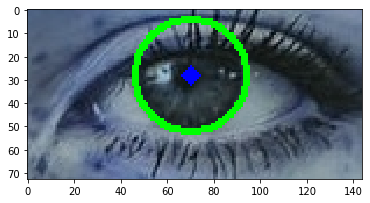

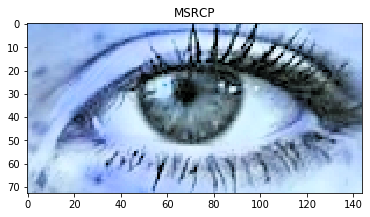

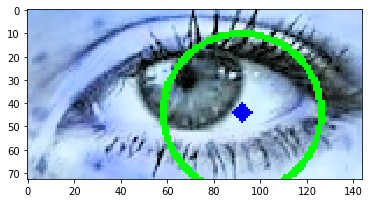

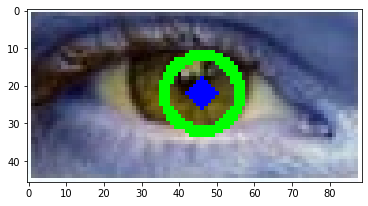

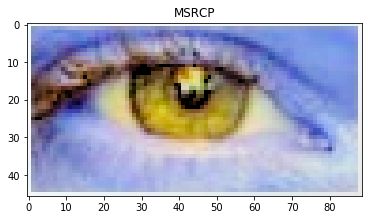

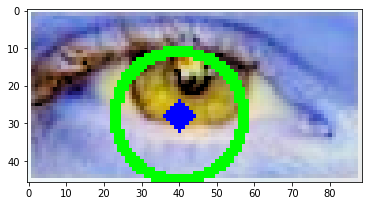

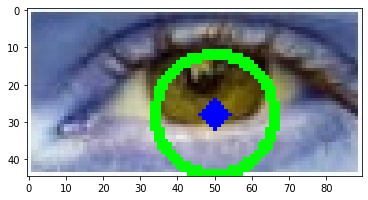

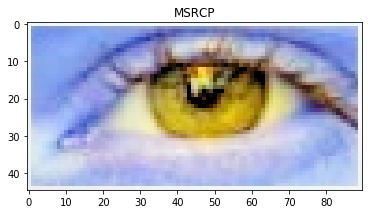

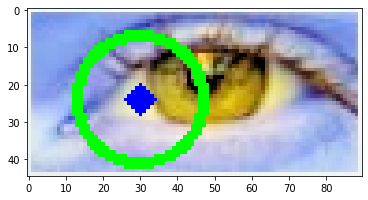

ValueError: all the input arrays must have same number of dimensions

In [2]:
import glob
import cv2 
import os

import m3Iris, m3F,  retinexRunnable

inputFolder = "eyes/"
outputFolder = "irises/"
irisesExpected = m3F.filecount(inputFolder)
irisesFound = 0

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    

    # DO STUFF TO ALL IMAGES BELOW (SENDS IMAGEPATH TO YOUR FUNCTIONS)
    # *************************
    if (m3F.evalSize(imagePath,10,10)):
        imgIn = cv2.imread(imagePath, 1)
        
        # IMAGE PROCESSING HERE:
        imgOut = m3Iris.findCircle(imgIn)
        imgMSRCP = retinexRunnable.runMSRCP(imagePath)
        imgOut2 = m3Iris.findCircle(imgMSRCP)
        
    else:
        print("****************************************************************************************************************")
        m3F.printRed("####IMAGE TOOO SMALL###")
        continue;
        # *************************

     #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    imagePath = outputFolder + imagePath
    print("imagePath", imagePath)
    #print("length",len(imgOut))
    
    if (type(imgOut) == type(list())):
        #print("was list")
        # if output 
        eyes = iter(imgOut) # used to iterate thru an array. the output of first next() is the first element of array, and so on
        
        cv2.imwrite(imagePath,next(eyes))
        irisesFound += 1
    else:
        if not(type(imgOut) == type(None)):
            cv2.imwrite(imagePath,imgOut)
            irisesFound += 1
        #else:   
            #m3F.printRed("IMAGE NULL")
            
m3F.printBlue("Found {}% of irises in the images".format(irisesFound/irisesExpected*100))

